In [87]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random

In [121]:
def processImg(image):
    
    imageData = []
    
    for i in image:
        imageSlice = [float(x) for x in i.split(" ")[0:14]]
        imageData.append(imageSlice)
    
    imageData = np.array(imageData)
    imageData = np.reshape(imageData, (196,))
    return (imageData)
        
    

In [122]:
def readData(filename):
    
    f = open(filename,'r')

    data = []
    i=0
    for x in f:
        data.append(x)
        
    imgData = []
    imgLabel = []
    
    trainData = []
    trainLabel = []

    for num in range(0,10):
        for fileNo in range(0,250):

            startRow = fileNo*16 + num*4000
            fileData = data[startRow:(startRow+16)]
            img = processImg(fileData[1:15])

            imgData.append(img)
            imgLabel.append(num)
            
    return([imgData,imgLabel])
    
    
    

In [174]:
#Change file paths accordingly
trainData,trainLabel = readData('/home/roshan/Documents/FreelanceWork/MNISTPerceptron/digits_train.txt')
testData,testLabel = readData('/home/roshan/Documents/FreelanceWork/MNISTPerceptron/digits_test.txt')

5


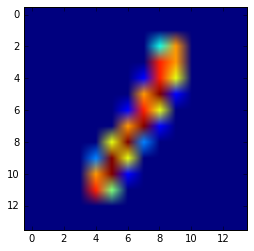

In [288]:
fileNo=1323

plt.imshow( np.reshape(trainData[fileNo],(14,14)))
print(trainLabel[fileNo])    

## Perceptron Modeling


#### Helper functions

In [289]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def shuffleData(data,label):
    '''
    Shuffles the data so that all digits are not stacked sequentially
    '''
    
    zipData = [i for i in zip(data,label)]
    random.shuffle(zipData)
    
    data = [np.array(i[0]) for i in zipData]
    label = [i[1] for i in zipData]
    
    return([data,label])


def predict(weight, data):
    '''
    Given input data and weights, outputs binary classification prediction
    '''
    
    y_pred = np.array([sigmoid(x) for x in np.matmul(data,W)])
    
    output = np.array([1 if x>= 0.5 else 0 for x in y_pred ])
    
    return(output)


def likelihood(pred,labels):
    '''Calculates log likelihood function'''
    
    logpred = np.array([math.log(i) for i in pred])
    
    return(-np.mean(labels*logpred + (1-labels)*(1-logpred)))


def accuracy(W,data,label):
    '''Calculates accuracy metric'''
    
    pred = predict(W,data)
    out = [1 if x[0]==x[1] else 0 for x in zip(pred,label) ]
    
    return(sum(out)/float(len(pred)))
    

In [177]:
#Creating Labels for neural network for classifying the digit 5
trainLabel2 = [1 if x == 5 else 0 for x in trainLabel]
testLabel2 = [1 if x == 5 else 0 for x in testLabel]

trainData,trainLabel2 = shuffleData(trainData,trainLabel2)
testData,testLabel2 = shuffleData(testData,testLabel2)

#### Training the model

In [ ]:
# SETTING HYPERPARAMETERS

trainSize = len(trainData)
batchSize = 100
nEpochs = 15
learningRate = 0.001

W = np.random.uniform(low = -np.sqrt(6.0/(196 + 1)), high = np.sqrt(6.0/(196 + 1)), size= (196,))

In [290]:
# TRAINING
for i in range(nEpochs):
    
    for batch in range(0,len(trainData),batchSize):
    
        batchData = np.array(trainData[batch:(batch+batchSize)])
        batchLabel = np.array(trainLabel2[batch:(batch+batchSize)])
        
        y_pred = np.array([sigmoid(x) for x in np.matmul(batchData,W)])

        cost = likelihood(y_pred,batchLabel)
        #print("cost is %f"%cost)
        
        for wgt in range(len(W)):
            inputSlice = batchData[:,wgt]
            error = batchLabel - y_pred

            derivative = np.sum(inputSlice*error)
            W[wgt] = W[wgt] + learningRate*derivative
            
        
        trainAccuracy = accuracy(W,trainData,trainLabel2)
        testAccuracy = accuracy(W,testData,testLabel2)
    print("train accuracy is %f and test accuracy is %f"%(trainAccuracy,testAccuracy))
    
        
        
    
    

train accuracy is 0.949200 and test accuracy is 0.939600
train accuracy is 0.950000 and test accuracy is 0.940000
train accuracy is 0.950800 and test accuracy is 0.940400
train accuracy is 0.951200 and test accuracy is 0.940400
train accuracy is 0.951200 and test accuracy is 0.940400
train accuracy is 0.951200 and test accuracy is 0.940800
train accuracy is 0.951200 and test accuracy is 0.941200
train accuracy is 0.951600 and test accuracy is 0.941200
train accuracy is 0.951600 and test accuracy is 0.941600
train accuracy is 0.951600 and test accuracy is 0.942000
train accuracy is 0.951200 and test accuracy is 0.942000
train accuracy is 0.952000 and test accuracy is 0.942000
train accuracy is 0.952400 and test accuracy is 0.942800
train accuracy is 0.952400 and test accuracy is 0.942800
train accuracy is 0.953600 and test accuracy is 0.942800


[0 0 0 1 0 0 0 0 0 0]
0


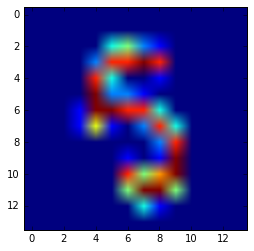

In [298]:
print(predict(W,testData[15:25]))

plt.imshow( np.reshape(testData[18],(14,14)))
print(testLabel2[fileNo]) 
    
        